In [98]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as st


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px



Part 1 - EDA <a class="anchor" id="eda"></a>
1. [Which 3 features have the highest number of missing values](#question_1)
2. [How the price behave over the years?](#question_2)
3. [Plot the the feature distribution using histograms](#question_3)
4. [Compute and order the features by their correlation with label](#question_4)
5. [Add more EDA that will help you understand the data and support your modeling decisions](#question_5)

In [63]:
df = pd.read_csv('train.csv') 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(exclude=['int', 'float']).columns

df_num = df[numerical_columns]
df_cat = df[categorical_columns.tolist() + ['SalePrice']]

df_num.info()
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

### 3 features with the highest number of missing values <a class="anchor" id="question_1"></a>

<Axes: >

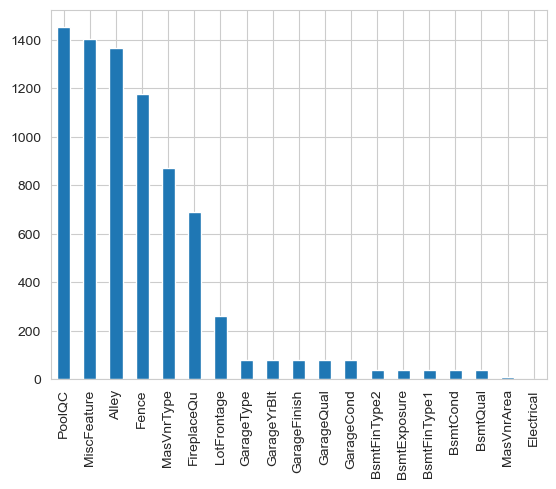

In [32]:
sns.set_style("whitegrid")
missing_val = df.isnull().sum()
missing_val = missing_val[missing_val > 0]
missing_val.sort_values(ascending=False, inplace=True)
missing_val.plot.bar()

In [6]:
# Percent of missing values
missing_val / df.shape[0] *100


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

### How the price behave over the years? <a class="anchor" id="question_2"></a>
[back to EDA](#EDA)

In [7]:
prices_over_years = df.loc[:,(['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'SalePrice'])]
mo_of_sale = df['MoSold'].astype (str) + '.' + df['YrSold'].astype (str)
prices_over_years.insert(2, 'DateSold', pd.to_datetime(mo_of_sale,format="%m.%Y"))
prices_over_years


,MoSold,YrSold,DateSold,YearBuilt,YearRemodAdd,SalePrice
0,2,2008,2008-02-01,2003,2003,208500
1,5,2007,2007-05-01,1976,1976,181500
2,9,2008,2008-09-01,2001,2002,223500
3,2,2006,2006-02-01,1915,1970,140000
4,12,2008,2008-12-01,2000,2000,250000
...,...,...,...,...,...,...
1455,8,2007,2007-08-01,1999,2000,175000
1456,2,2010,2010-02-01,1978,1988,210000
1457,5,2010,2010-05-01,1941,2006,266500
1458,4,2010,2010-04-01,1950,1996,142125


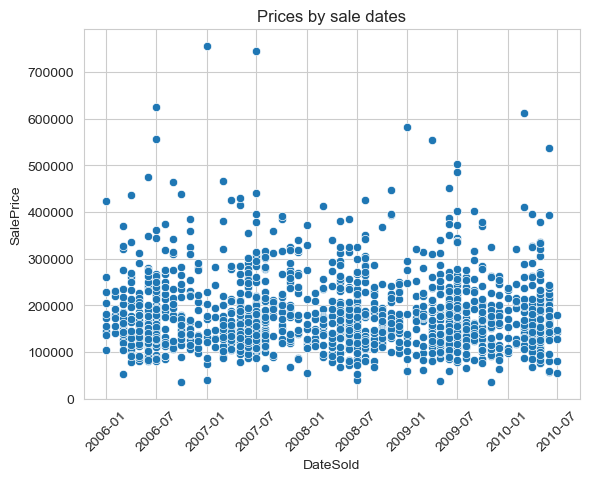

In [8]:
sns.scatterplot(data=prices_over_years, x="DateSold", y="SalePrice").set_title('Prices by sale dates')
plt.xticks(rotation=45)
plt.show()

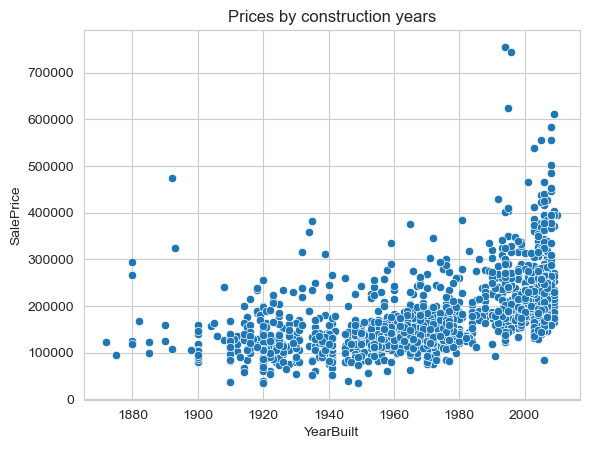

In [9]:
sns.scatterplot(data=prices_over_years, x="YearBuilt", y="SalePrice").set_title('Prices by construction years')
plt.show()

### Plot the the feature distribution using histograms <a class="anchor" id="question_3"></a>
[back to EDA](#EDA)


<Figure size 640x480 with 0 Axes>

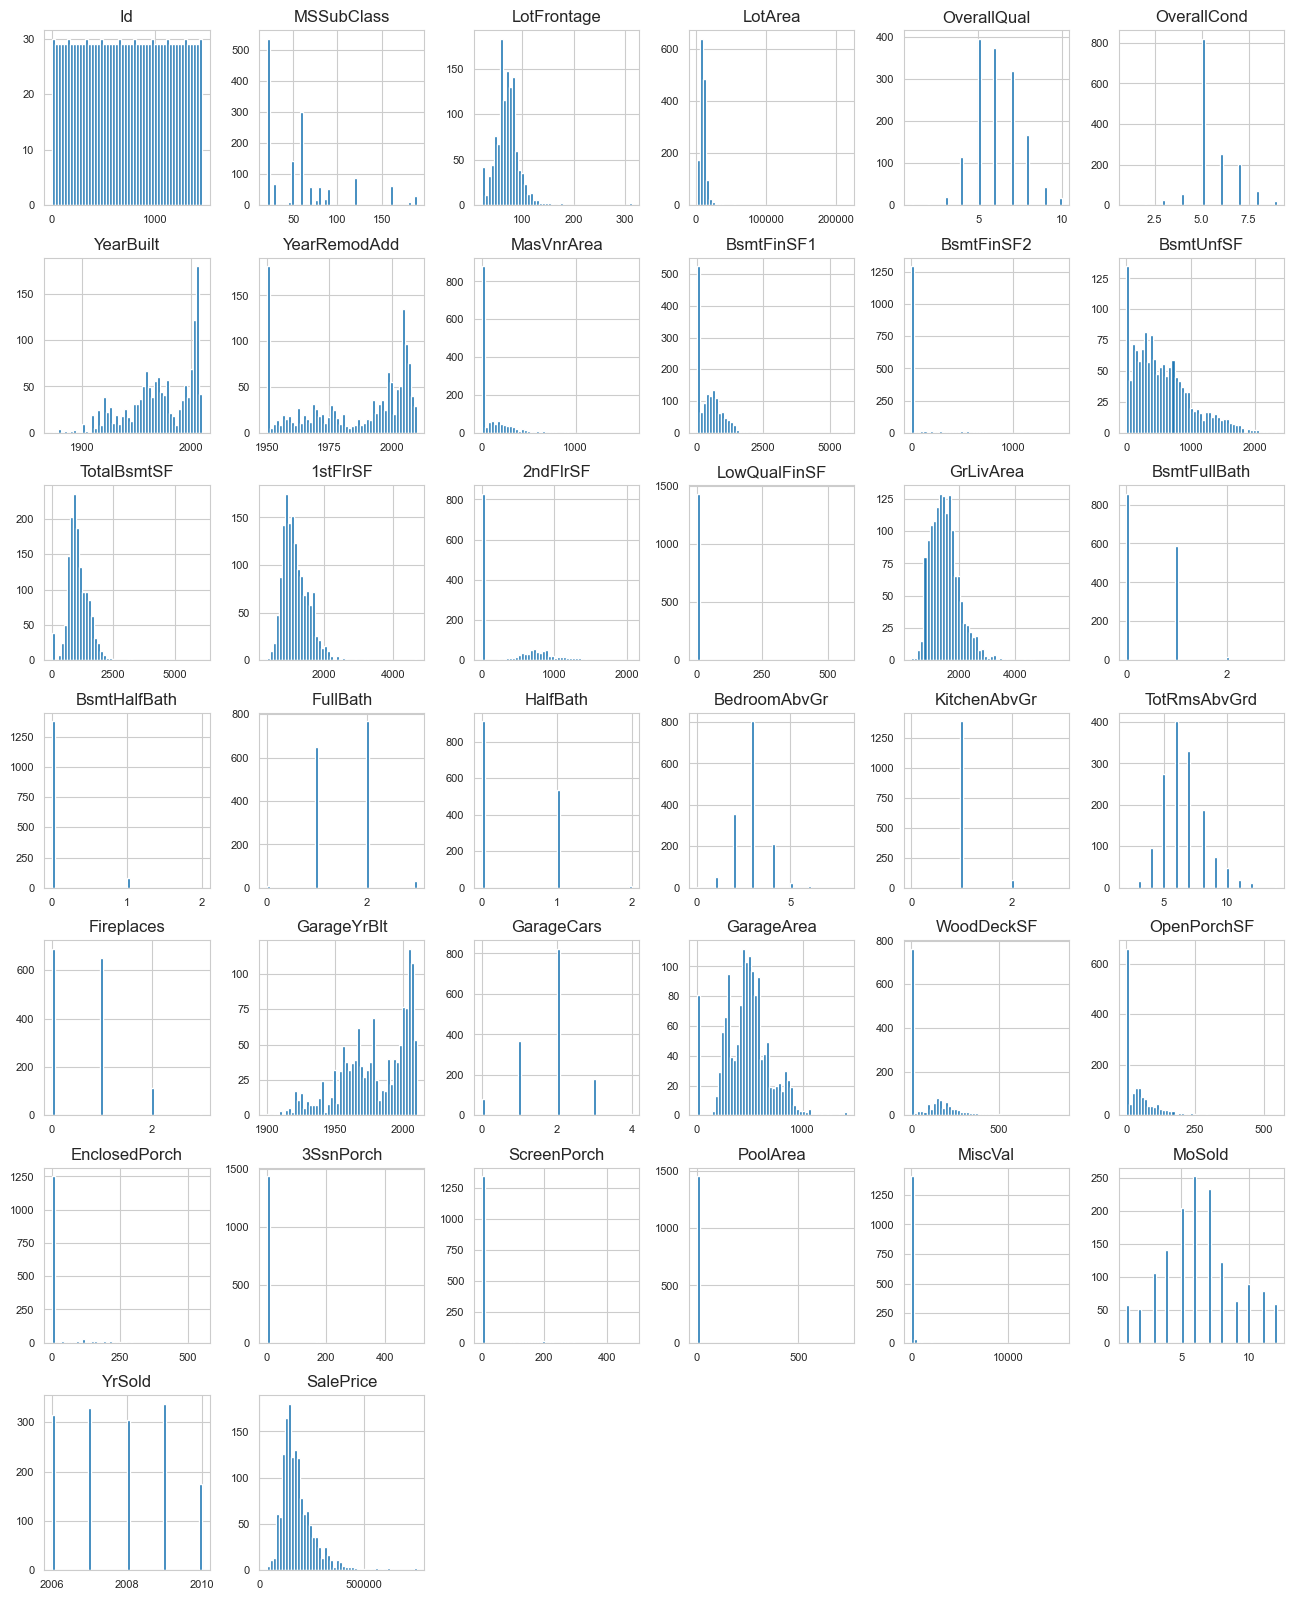

In [10]:
plt.figure()

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

plt.show()

### Compute and order the features by their correlation with label <a class="anchor" id="question_4"></a>
[back to EDA](#EDA)

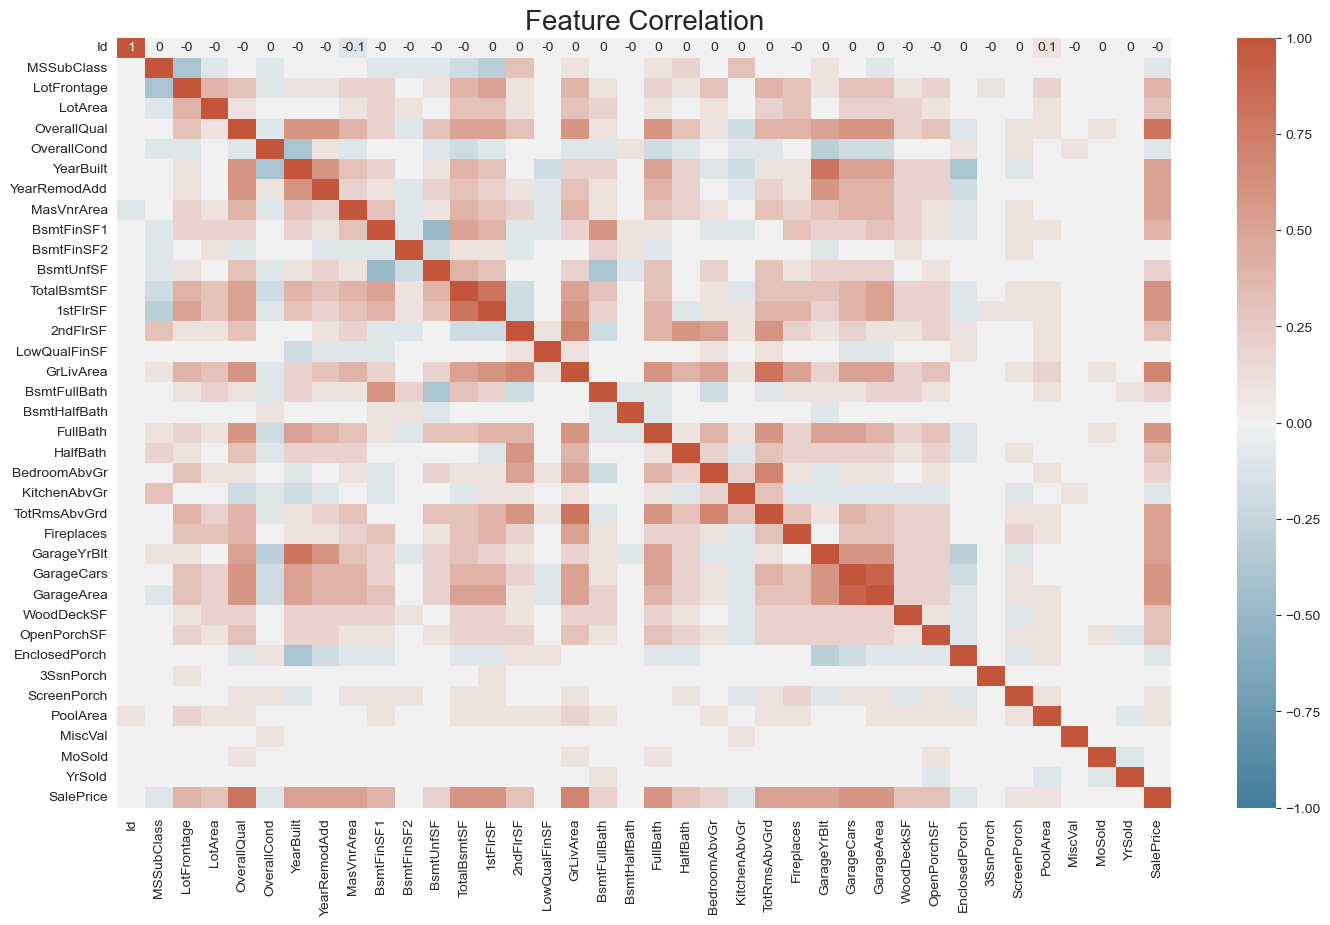

In [11]:
correlation_matrix = df_num.corr()
plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix.round(1), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.title('Feature Correlation', fontsize=20)
plt.show;

In [12]:
# Calculate correlations
correlations = df_num.corr()['SalePrice'].drop('SalePrice')

# Sort correlations in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Print top 10 of sorted correlations with feature names
print(sorted_correlations[:10])

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


### 1.5 More EDA <a class="anchor" id="question_5"></a>
[back to EDA](#EDA)

### Handle with missing values

In [13]:
missing_val

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Pool, Alley, Fence fill na with string

In [60]:
df.loc[:,'PoolQC'].fillna('NoPool', inplace=True)
df.loc[:,'Alley'].fillna('NoAccess', inplace=True)
df.loc[:,'Fence'].fillna('NoFence', inplace=True)
df.loc[:,'FireplaceQu'].fillna('NoFireplace', inplace=True)


Most of values MasVnrArea are 0 if MasVnrType is missing, but some of them has non zero value

In [39]:
mva = df[df.loc[:,'MasVnrType'].isna()]['MasVnrArea']
mva[mva > 0]


624     288.0
773       1.0
1230      1.0
1300    344.0
1334    312.0
Name: MasVnrArea, dtype: float64

Meanwhile two rows have existing MasVnrType while MasVnrArea == 0.


In [40]:
mvt = df[df.loc[:,'MasVnrArea'] == 0]['MasVnrType']
print(mvt.unique())
mvt[~mvt.isna()]



[nan 'BrkFace' 'Stone']


688     BrkFace
1241      Stone
Name: MasVnrType, dtype: object

In [41]:
# Replace MasVnrArea with 0 where MasVnrArea==1
index_mva = df[df.loc[:,'MasVnrArea'] == 1].index
df.loc[index_mva,'MasVnrArea'] = 0

# Replace MasVnrType in rows where MasVnrArea==0 with 'NoMasVnr' 
index_mvt = df[(df.loc[:,'MasVnrArea'] == 0) & (~df.loc[:,'MasVnrType'].isna())].index
df.loc[index_mvt,'MasVnrType'] = 'NoMasVnr'

# Fill missing values in MasVnrType with 'NoMasVnr' 
df.loc[:,'MasVnrType'].fillna('NoMasVnr', inplace=True)


In [62]:
missing_val = df.isnull().sum()
missing_val = missing_val[missing_val > 0]
missing_val.sort_values(ascending=False, inplace=True)
missing_val

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrArea       8
Electrical       1
dtype: int64

LotFrontage has 259 missing values. Let's use an SVM Regressor algorithm to estimate and fill in these missing values.

In [101]:
train_LF = df[~df.LotFrontage.isnull()]
test_LF = df[df.LotFrontage.isnull()]
target = train_LF['LotFrontage']

print(f"Number of filled LotFrontage data: {len(train_LF)}")
print(f"Number of missing LotFrontage data: {len(test_LF)}")

display(pd.DataFrame(df['LotFrontage'].describe()).transpose())

Number of filled LotFrontage data: 1201
Number of missing LotFrontage data: 259


,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0


Now, let's look at the LotFrontage values in the Train LotFrontage dataset using a boxplot and distribution plot. Here's what we can see:

* Many properties have low LotFrontage values, shown as a peak on the left side of the distribution plot. The boxplot suggests some of these values might be unusual, as they're far from the main cluster.
* There are also quite a few properties with high LotFrontage values, going beyond what's typical.

In simple terms, there are outliers present at both of the LotFrontage range.


c:\Users\dmitr\miniconda3\envs\y_data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



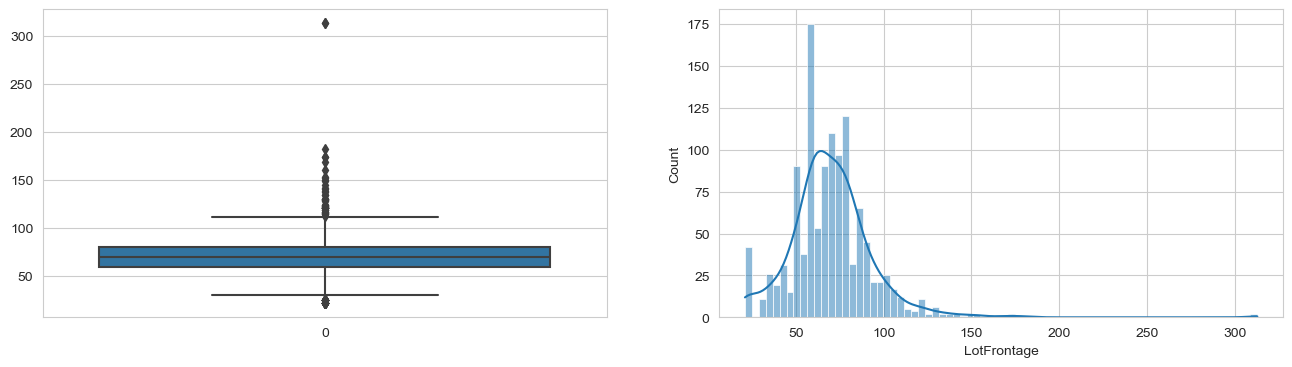

In [103]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(target, ax=ax[0])
sns.histplot(target, ax=ax[1], kde=True)
plt.show()


In [111]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

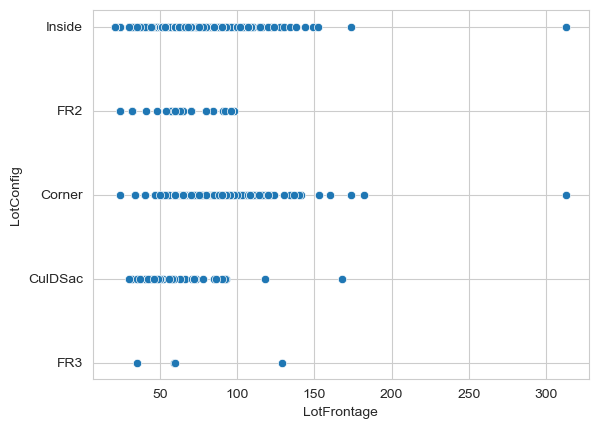

In [126]:
lot = df[df['LotConfig'] == 'R'][['LotFrontage', 'LotArea']]
sns.scatterplot(df, x="LotFrontage", y="LotConfig")
df['LotConfig'].unique()

In [108]:
lot['new'] = lot['LotArea'] / lot['LotFrontage']
lot['new'].mean()

C:\Users\dmitr\AppData\Local\Temp\ipykernel_14904\2183080978.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



142.4938904406981

Miscellaneous feature not covered in other categories

In [19]:
df[(df['MiscVal'] != 0)][['MiscFeature']].groupby('MiscFeature').value_counts().sort_values(ascending=False)

MiscFeature
Shed    48
Gar2     2
Othr     1
TenC     1
Name: count, dtype: int64

In [ ]:
# Create dummy columns based on values in MiscFeature
dummy_columns = pd.get_dummies(df['MiscFeature'], prefix='mf')

# Multiply each dummy column by corresponding MiscVal
for col in dummy_columns.columns:
    dummy_columns[col] = dummy_columns[col] * df['MiscVal']

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([df, dummy_columns], axis=1)

# Drop the original 'MiscFeature' column
df.drop(['MiscFeature','MiscVal'], axis=1, inplace=True)


In [56]:
df[['Street', 'Alley','LotFrontage']].groupby(['Street','Alley']).count()

LotFrontage
Street Alley                
Grvl   NoAccess            5
Pave   Grvl               47
       NoAccess         1110
       Pave               39

In [58]:
df[df['LotFrontage'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,mf_Gar2,mf_Othr,mf_Shed,mf_TenC
7,8,60,RL,NaN,10382,Pave,NoAccess,IR1,Lvl,AllPub,...,NoFence,11,2009,WD,Normal,200000,0,0,350,0
12,13,20,RL,NaN,12968,Pave,NoAccess,IR2,Lvl,AllPub,...,NoFence,9,2008,WD,Normal,144000,0,0,0,0
14,15,20,RL,NaN,10920,Pave,NoAccess,IR1,Lvl,AllPub,...,GdWo,5,2008,WD,Normal,157000,0,0,0,0
16,17,20,RL,NaN,11241,Pave,NoAccess,IR1,Lvl,AllPub,...,NoFence,3,2010,WD,Normal,149000,0,0,700,0
24,25,20,RL,NaN,8246,Pave,NoAccess,IR1,Lvl,AllPub,...,MnPrv,5,2010,WD,Normal,154000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NoAccess,IR1,Lvl,AllPub,...,NoFence,4,2007,WD,Normal,182900,0,0,0,0
1431,1432,120,RL,NaN,4928,Pave,NoAccess,IR1,Lvl,AllPub,...,NoFence,10,2009,WD,Normal,143750,0,0,0,0
1441,1442,120,RM,NaN,4426,Pave,NoAccess,Reg,Lvl,AllPub,...,NoFence,5,2008,WD,Normal,149300,0,0,0,0
1443,1444,30,RL,NaN,8854,Pave,NoAccess,Reg,Lvl,AllPub,...,NoFence,5,2009,WD,Normal,121000,0,0,0,0
